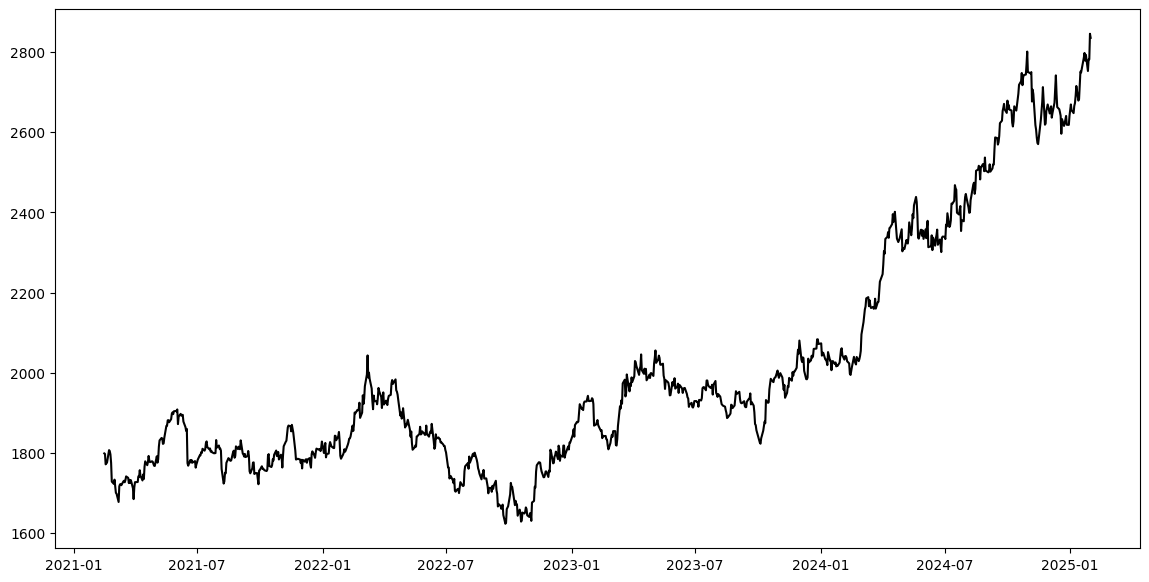

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # Ensure F is imported for activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# Load and prepare data
df = pd.read_csv('Gold Futures Historical Data_3Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')


# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Window width
window_width = 30  # Adjusted window width for experimentation

# Data scaling (scale each feature individually)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)



# Prepare sequences and corresponding dates
X, y_full, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y_full.append(data_scaled[i, 0])  # Assuming 'Price' is the target
    dates.append(df['Date'].iloc[i])

X = np.array(X)
y_full = np.array(y_full)
dates = np.array(dates)


# Define the inverse_transform function globally
def inverse_transform(y_scaled):
    """
    Inverse transform the scaled 'Price' values back to the original scale.
    Assumes that the scaler was fit on all features.
    """
    y_scaled = np.array(y_scaled).reshape(-1, 1)
    # Create a placeholder for other features with zeros
    zeros = np.zeros((y_scaled.shape[0], len(features) - 1))
    y_combined = np.hstack((y_scaled, zeros))
    y_inv = scaler.inverse_transform(y_combined)
    return y_inv[:, 0]


# At the end of the full-set original price cell, after plotting:
full_dates = dates        # Save the original full-set dates (e.g. shape (N_full,))
full_actual = inverse_transform(y_full)   # Save the actual price curve (e.g. shape (N_full,))


# Plotting the full dataset with predictions over validation and test sets only
plt.figure(figsize=(14, 7))

#all_prices_inv_full = scaler.inverse_transform(data_scaled)[:, 0]
#plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')

# Actual Price
plt.plot(dates, full_actual, color='black', label='Actual Price')




Training (with validation) and fine-tuning for neural model: LSTM
[LSTM] Epoch 1/300, Train Loss: 0.016170, Val Loss: 0.003979
[LSTM] Epoch 100/300, Train Loss: 0.000341, Val Loss: 0.000502
[LSTM] Epoch 200/300, Train Loss: 0.000298, Val Loss: 0.000837
[LSTM] Epoch 300/300, Train Loss: 0.000215, Val Loss: 0.000419


/tmp/ipykernel_1590521/3789696253.py:239: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))



Training (with validation) and fine-tuning for neural model: GRU
[GRU] Epoch 1/300, Train Loss: 0.012953, Val Loss: 0.030702
[GRU] Epoch 100/300, Train Loss: 0.000252, Val Loss: 0.000408
[GRU] Epoch 200/300, Train Loss: 0.000206, Val Loss: 0.000718
[GRU] Epoch 300/300, Train Loss: 0.000202, Val Loss: 0.000476


/tmp/ipykernel_1590521/3789696253.py:239: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))



Training (with validation) and fine-tuning for neural model: RNN
[RNN] Epoch 1/300, Train Loss: 0.014289, Val Loss: 0.007118
[RNN] Epoch 100/300, Train Loss: 0.000286, Val Loss: 0.000582
[RNN] Epoch 200/300, Train Loss: 0.000328, Val Loss: 0.000730
[RNN] Epoch 300/300, Train Loss: 0.000405, Val Loss: 0.000475


/tmp/ipykernel_1590521/3789696253.py:239: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))



Training (with validation) and fine-tuning for neural model: CNN
[CNN] Epoch 1/300, Train Loss: 0.009384, Val Loss: 0.016345
[CNN] Epoch 100/300, Train Loss: 0.000300, Val Loss: 0.000694
[CNN] Epoch 200/300, Train Loss: 0.000231, Val Loss: 0.000720
[CNN] Epoch 300/300, Train Loss: 0.000361, Val Loss: 0.002601


/tmp/ipykernel_1590521/3789696253.py:239: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


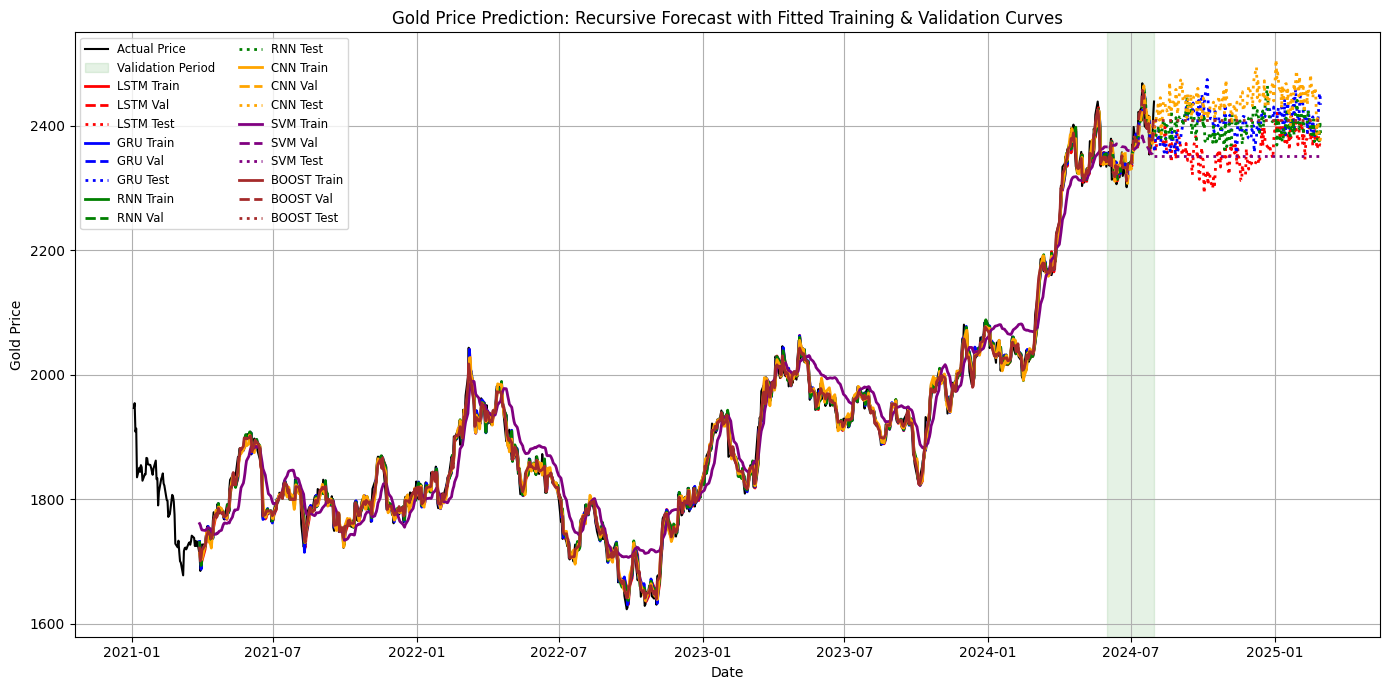

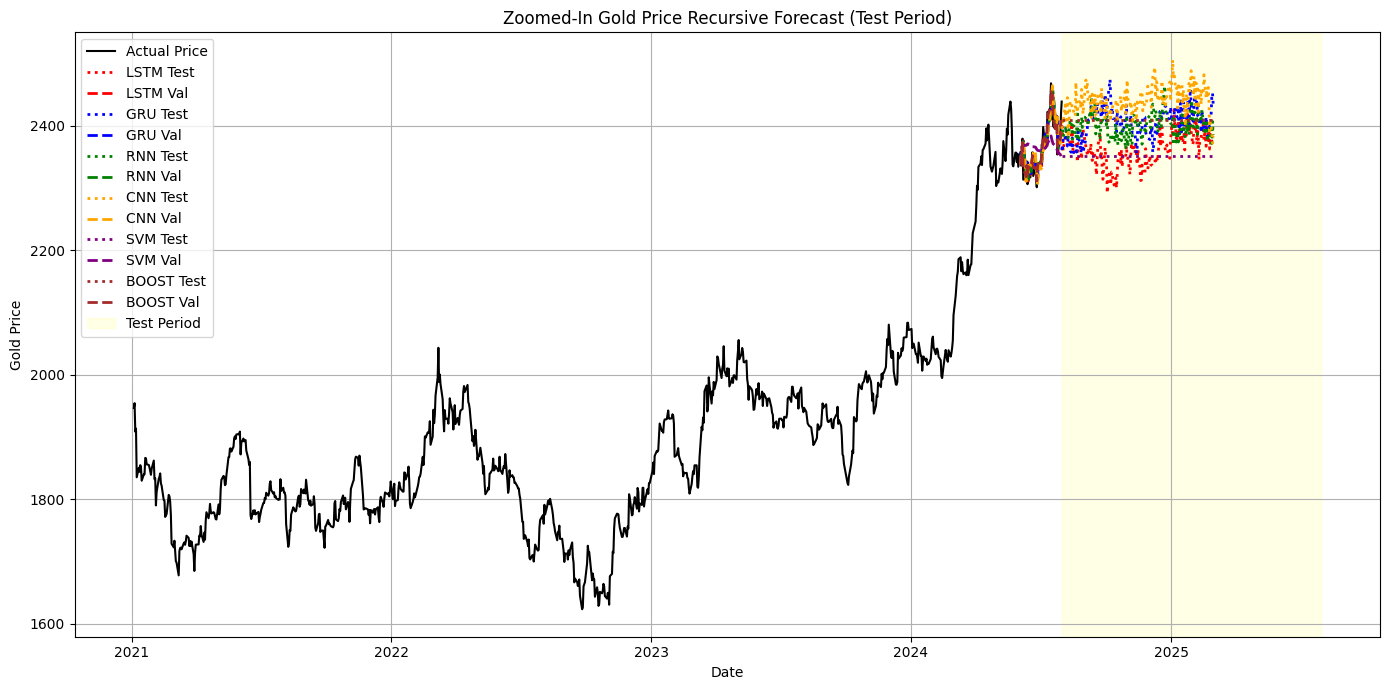

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import joblib  # For saving/loading scikit-learn models

# For SVM and Boosting:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# -------------------------
# SET RANDOM SEEDS FOR REPRODUCIBILITY
# -------------------------
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

# -------------------------
# DATA LOADING, CLEANING, AND PREPARATION
# -------------------------
df = pd.read_csv('Gold Futures Historical Data_3Yr_Train.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform numeric columns
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Define features
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width (number of past days used for prediction)
window_width = 60  # <-- Adjust as needed

# Create sequences: Each sample is (window_width, 4), target is the next day's 4 values.
X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i])
    all_dates.append(df['Date'].iloc[i])
X = np.array(X)  # shape: (num_samples, window_width, 4)
y = np.array(y)  # shape: (num_samples, 4)
all_dates = np.array(all_dates)

# --- Split into training, validation, and test sets ---
train_mask = (all_dates >= pd.to_datetime('2021-01-04')) & (all_dates <= pd.to_datetime('2024-06-01'))
val_mask   = (all_dates >= pd.to_datetime('2024-06-01')) & (all_dates < pd.to_datetime('2024-07-31'))
test_mask  = (all_dates >= pd.to_datetime('2024-07-31')) & (all_dates <= pd.to_datetime('2025-03-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val     = X[val_mask], y[val_mask]
X_test, y_test   = X[test_mask], y[test_mask]
train_dates = all_dates[train_mask]
val_dates   = all_dates[val_mask]
test_dates  = all_dates[test_mask]

# Convert to PyTorch tensors (for the neural network models)
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor   = torch.from_numpy(X_val).float()
y_val_tensor   = torch.from_numpy(y_val).float()
X_test_tensor  = torch.from_numpy(X_test).float()
y_test_tensor  = torch.from_numpy(y_test).float()

# Create TensorDatasets and DataLoaders
batch_size = 32  # <-- Adjust batch size as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, y_val_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader    = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# -------------------------
# MODEL DEFINITION (NEURAL NETWORK MODELS)
# -------------------------
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        input_size = len(features)  # 4 features
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,          # <-- Adjust hidden size if desired
                num_layers=2,             # <-- Adjust number of layers if desired
                batch_first=True,
                dropout=0.1,              # <-- Adjust dropout (also affects volatility)
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, input_size)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN'")

    def forward(self, x):
        if self.model_type == 'CNN':
            # Permute input: (batch, window_width, 4) --> (batch, 4, window_width)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]  # Use the last time step
            out = self.fc(out)
        return out  # shape: (batch, 4)

# -------------------------
# CUSTOM WEIGHTED HUBER LOSS
# -------------------------
def weighted_huber_loss(preds, targets, delta=1.0, weight_price=2.0):
    # Calculate elementwise Huber loss
    error = preds - targets
    abs_error = torch.abs(error)
    quadratic = torch.minimum(abs_error, torch.tensor(delta, device=preds.device))
    linear = abs_error - quadratic
    loss = 0.5 * quadratic ** 2 + delta * linear
    # Multiply the loss for the price feature (index 0) by a weight
    loss[:, 0] *= weight_price
    return torch.mean(loss)

# -------------------------
# EARLY STOPPING
# -------------------------
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# -------------------------
# TRAINING FUNCTION FOR NEURAL MODELS
# -------------------------
def train_and_evaluate(model_name, train_loader, val_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BaseModel(model_type=model_name).to(device)
    
    # Use weighted Huber loss
    criterion = lambda preds, targets: weighted_huber_loss(preds, targets, delta=1.0, weight_price=2.0)
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)  # <-- Adjust learning rate if desired
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 300 # <-- Adjust number of epochs as needed
    best_val_loss = float('inf')
    
    best_model_path = f'best_model_{model_name}_4d.pt'
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    else:
        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                preds = model(X_batch)
                loss = criterion(preds, y_batch)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())
            avg_train_loss = np.mean(train_losses)
            
            # Validation evaluation:
            model.eval()
            val_losses = []
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    preds = model(X_batch)
                    loss = criterion(preds, y_batch)
                    val_losses.append(loss.item())
            avg_val_loss = np.mean(val_losses)
            
            scheduler.step(avg_val_loss)
            early_stopping(avg_val_loss)
            if early_stopping.early_stop:
                print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
                break
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(model.state_dict(), best_model_path)
            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f'[{model_name}] Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}')
        model.load_state_dict(torch.load(best_model_path, map_location=device))
    return model

# --- Fine-tuning: Retrain on training + validation data ---
def fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = lambda preds, targets: weighted_huber_loss(preds, targets, delta=1.0, weight_price=2.0)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = model(X_train_val_tensor.to(device))
        loss = criterion(preds, y_train_val_tensor.to(device))
        loss.backward()
        optimizer.step()
    return model

# -------------------------
# UPDATED RECURSIVE FORECASTING FUNCTION WITH WEIGHTED NOISE INJECTION
# -------------------------
def recursive_forecast_with_weighted_noise(model, initial_window, forecast_horizon, device, noise_std_price=0.02, noise_std_others=0.005, price_weight=1.0):
    """
    Recursive forecasting with selective Gaussian noise injection.
    Heavier noise is added to the price prediction (first feature) to preserve realistic volatility.
    """
    model.eval()  # Use deterministic forward pass then add noise manually.
    preds = []
    current_window = initial_window.clone().to(device)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)
        with torch.no_grad():
            pred = model(input_tensor).squeeze(0)
        # Create noise vectors: heavier for price (index 0) and lighter for others.
        noise = torch.zeros_like(pred)
        noise[0] = torch.randn(1).to(device) * noise_std_price
        noise[1:] = torch.randn(3).to(device) * noise_std_others
        pred_noisy = pred + noise
        # Optionally, apply a multiplier to the price prediction before feeding it back:
        pred_noisy[0] = pred_noisy[0] * price_weight
        preds.append(pred_noisy.cpu().numpy())
        # Update window: discard the oldest day and append the new prediction.
        current_window = torch.cat((current_window[1:], pred_noisy.unsqueeze(0)), dim=0)
    return np.array(preds)

# -------------------------
# PREDICTION FUNCTIONS (ONE-STEP/FITTED)
# -------------------------
def predict_nn(model, X_tensor, device):
    model.eval()
    with torch.no_grad():
        preds = model(X_tensor.to(device)).cpu().numpy()
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

def predict_sklearn(model, X, flatten=True):
    if flatten:
        X_flat = X.reshape(X.shape[0], -1)
    else:
        X_flat = X
    preds = model.predict(X_flat)
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

# -------------------------
# TRAIN AND PREDICT WITH NEURAL NETWORK MODELS
# -------------------------
neural_model_names = ['LSTM', 'GRU', 'RNN', 'CNN']
predictions_all = {}  # To store predictions for 'train', 'val', and 'test'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare combined training + validation data for fine-tuning:
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
X_train_val_tensor = torch.from_numpy(X_train_val).float()
y_train_val_tensor = torch.from_numpy(y_train_val).float()

for model_name in neural_model_names:
    print(f"\nTraining (with validation) and fine-tuning for neural model: {model_name}")
    # Train using training and validation (with early stopping)
    model = train_and_evaluate(model_name, train_loader, val_loader)
    # Fine-tune on combined training+validation set:
    model = fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002)
    
    # One-step (fitted) predictions on training and validation:
    train_preds = predict_nn(model, X_train_tensor, device)
    val_preds   = predict_nn(model, X_val_tensor, device)
    
    # For test forecasting, use recursive forecasting.
    # Use the last window from training+validation (actual values) as the starting window.
    initial_window_nn = torch.from_numpy(X_train_val[-1]).float()
    forecast_horizon = len(test_dates)
    
    # Use the updated recursive forecasting with weighted noise injection:
    test_preds_rec = recursive_forecast_with_weighted_noise(model, initial_window_nn, forecast_horizon, device,
                                                            noise_std_price=0.02, noise_std_others=0.005, price_weight=1.0)
    test_preds_rec_inv = scaler.inverse_transform(test_preds_rec)
    
    # Save only the Price predictions (first column) for plotting
    predictions_all[model_name] = {
        'train': train_preds[:, 0],
        'val':   val_preds[:, 0],
        'test':  test_preds_rec_inv[:, 0]
    }

# -------------------------
# TRAIN AND PREDICT WITH SVM AND BOOSTING MODELS (scikit-learn)
# -------------------------
X_train_val_flat = np.concatenate((X_train, X_val), axis=0).reshape(-1, window_width * 4)
y_train_val_flat = np.concatenate((y_train, y_val), axis=0)

# --- SVM ---
svm_model_path = 'best_model_SVM_4d.pt'
if os.path.exists(svm_model_path):
    svr = joblib.load(svm_model_path)
    print(f"Loaded existing SVM model from {svm_model_path}")
else:
    svr = MultiOutputRegressor(SVR(kernel='rbf'))
    svr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(svr, svm_model_path)
    
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
train_preds_svm = predict_sklearn(svr, X_train, flatten=True)
val_preds_svm   = predict_sklearn(svr, X_val, flatten=True)

# For SVM/Boosting, here we use a simple recursive forecast:
recursive_forecast_sklearn = lambda model, initial_window, horizon: np.array([
    model.predict(initial_window.flatten().reshape(1, -1))[0]
    for _ in range(horizon)
])
X_train_val_np = np.concatenate((X_train, X_val), axis=0)
initial_window_np = X_train_val_np[-1]  # shape: (window_width, 4)
svr_test_rec = recursive_forecast_sklearn(svr, initial_window_np, len(test_dates))
svr_test_rec_inv = scaler.inverse_transform(svr_test_rec)

predictions_all['SVM'] = {
    'train': train_preds_svm[:, 0],
    'val':   val_preds_svm[:, 0],
    'test':  svr_test_rec_inv[:, 0]
}

# --- BOOSTING ---
boost_model_path = 'best_model_BOOST_4d.pt'
if os.path.exists(boost_model_path):
    gbr = joblib.load(boost_model_path)
    print(f"Loaded existing BOOST model from {boost_model_path}")
else:
    gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
    gbr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(gbr, boost_model_path)
    
train_preds_boost = predict_sklearn(gbr, X_train, flatten=True)
val_preds_boost   = predict_sklearn(gbr, X_val, flatten=True)
boost_test_rec = recursive_forecast_sklearn(gbr, initial_window_np, len(test_dates))
boost_test_rec_inv = scaler.inverse_transform(boost_test_rec)

predictions_all['BOOST'] = {
    'train': train_preds_boost[:, 0],
    'val':   val_preds_boost[:, 0],
    'test':  boost_test_rec_inv[:, 0]
}

# -------------------------
# PLOTTING RESULTS
# -------------------------
all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]

# Define colors for each model.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
plt.axvspan(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-07-31'),
            color='green', alpha=0.1, label='Validation Period')

for model_name, preds in predictions_all.items():
    plt.plot(train_dates, preds['train'], color=model_colors.get(model_name, 'grey'),
             linestyle='-', linewidth=2, label=f'{model_name} Train')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')

plt.title('Gold Price Prediction: Recursive Forecast with Fitted Training & Validation Curves')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
for model_name, preds in predictions_all.items():
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
plt.title('Zoomed-In Gold Price Recursive Forecast (Test Period)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.axvspan(pd.to_datetime('2024-07-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import joblib  # For saving/loading scikit-learn models

# For SVM and Boosting:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# -------------------------
# SET RANDOM SEEDS FOR REPRODUCIBILITY
# -------------------------
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

# -------------------------
# DATA LOADING, CLEANING, AND PREPARATION
# -------------------------
df = pd.read_csv('Gold Futures Historical Data_3Yr_Train.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform numeric columns
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Define features
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width (number of past days used for prediction)
window_width = 28  # <-- Adjust as needed

# Create sequences: Each sample is (window_width, 4), target is the next day's 4 values.
X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i])
    all_dates.append(df['Date'].iloc[i])
X = np.array(X)  # shape: (num_samples, window_width, 4)
y = np.array(y)  # shape: (num_samples, 4)
all_dates = np.array(all_dates)

# --- Split into training, validation, and test sets ---
train_mask = (all_dates >= pd.to_datetime('2021-01-04')) & (all_dates <= pd.to_datetime('2024-06-01'))
val_mask   = (all_dates >= pd.to_datetime('2024-06-01')) & (all_dates < pd.to_datetime('2024-07-31'))
test_mask  = (all_dates >= pd.to_datetime('2024-07-31')) & (all_dates <= pd.to_datetime('2025-03-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val     = X[val_mask], y[val_mask]
X_test, y_test   = X[test_mask], y[test_mask]
train_dates = all_dates[train_mask]
val_dates   = all_dates[val_mask]
test_dates  = all_dates[test_mask]

# Convert to PyTorch tensors (for the neural network models)
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor   = torch.from_numpy(X_val).float()
y_val_tensor   = torch.from_numpy(y_val).float()
X_test_tensor  = torch.from_numpy(X_test).float()
y_test_tensor  = torch.from_numpy(y_test).float()

# Create TensorDatasets and DataLoaders
batch_size = 32  # <-- Adjust batch size as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, y_val_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader    = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# -------------------------
# MODEL DEFINITION (NEURAL NETWORK MODELS)
# -------------------------
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        input_size = len(features)  # 4 features
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,          # <-- Adjust hidden size if desired
                num_layers=2,             # <-- Adjust number of layers if desired
                batch_first=True,
                dropout=0.1,              # <-- Adjust dropout (also affects volatility)
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, input_size)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN'")

    def forward(self, x):
        if self.model_type == 'CNN':
            # Permute input: (batch, window_width, 4) --> (batch, 4, window_width)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]  # Use the last time step
            out = self.fc(out)
        return out  # shape: (batch, 4)

# -------------------------
# EARLY STOPPING
# -------------------------
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# -------------------------
# TRAINING FUNCTION FOR NEURAL MODELS
# -------------------------
def train_and_evaluate(model_name, train_loader, val_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BaseModel(model_type=model_name).to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)  # <-- Adjust learning rate if desired
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 500  # <-- Adjust number of epochs as needed
    best_val_loss = float('inf')
    
    best_model_path = f'best_model_{model_name}_4d.pt'
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    else:
        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                preds = model(X_batch)
                loss = criterion(preds, y_batch)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())
            avg_train_loss = np.mean(train_losses)
            
            # Validation evaluation:
            model.eval()
            val_losses = []
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    preds = model(X_batch)
                    loss = criterion(preds, y_batch)
                    val_losses.append(loss.item())
            avg_val_loss = np.mean(val_losses)
            
            scheduler.step(avg_val_loss)
            early_stopping(avg_val_loss)
            if early_stopping.early_stop:
                print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
                break
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(model.state_dict(), best_model_path)
            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f'[{model_name}] Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}')
        model.load_state_dict(torch.load(best_model_path, map_location=device))
    return model

# --- Fine-tuning: Retrain on training + validation data ---
def fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.HuberLoss()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = model(X_train_val_tensor.to(device))
        loss = criterion(preds, y_train_val_tensor.to(device))
        loss.backward()
        optimizer.step()
    return model

# -------------------------
# RECURSIVE FORECASTING FUNCTIONS
# -------------------------
def recursive_forecast(model, initial_window, forecast_horizon, device):
    """
    Deterministic recursive forecasting.
    """
    model.eval()
    preds = []
    current_window = initial_window.clone().to(device)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)
        with torch.no_grad():
            pred = model(input_tensor)
        pred = pred.squeeze(0)
        preds.append(pred.cpu().numpy())
        # Update window: drop the oldest and add the new prediction
        current_window = torch.cat((current_window[1:], pred.unsqueeze(0)), dim=0)
    return np.array(preds)

def recursive_forecast_mc_dropout(model, initial_window, forecast_horizon, device, n_samples=10):
    """
    Recursive forecasting with Monte Carlo dropout.
    At each step, run the model 'n_samples' times (with dropout active) and randomly choose one sample.
    """
    # Activate dropout during inference:
    model.train()  
    preds = []
    current_window = initial_window.clone().to(device)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)
        sample_preds = []
        for _ in range(n_samples):
            with torch.no_grad():
                pred = model(input_tensor)
            sample_preds.append(pred.squeeze(0))
        sample_preds = torch.stack(sample_preds)  # shape: (n_samples, 4)
        # Randomly select one of the samples
        idx = random.randint(0, n_samples - 1)  # <-- Adjust or change selection logic if desired
        chosen_pred = sample_preds[idx]
        preds.append(chosen_pred.cpu().numpy())
        current_window = torch.cat((current_window[1:], chosen_pred.unsqueeze(0)), dim=0)
    return np.array(preds)

def recursive_forecast_with_noise(model, initial_window, forecast_horizon, device, noise_std=0.02):
    """
    Recursive forecasting with Gaussian noise injection.
    'noise_std' can be tuned to simulate day-to-day market volatility.
    """
    model.eval()  # Use deterministic forward pass then add noise manually.
    preds = []
    current_window = initial_window.clone().to(device)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)
        with torch.no_grad():
            pred = model(input_tensor)
        pred = pred.squeeze(0)
        # Inject Gaussian noise in the scaled space:
        noise = torch.randn(pred.size()).to(device) * noise_std  # <-- Adjust noise_std to tune volatility
        pred_noisy = pred + noise
        preds.append(pred_noisy.cpu().numpy())
        current_window = torch.cat((current_window[1:], pred_noisy.unsqueeze(0)), dim=0)
    return np.array(preds)

# -------------------------
# PREDICTION FUNCTIONS (ONE-STEP/FITTED)
# -------------------------
def predict_nn(model, X_tensor, device):
    model.eval()
    with torch.no_grad():
        preds = model(X_tensor.to(device)).cpu().numpy()
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

def predict_sklearn(model, X, flatten=True):
    if flatten:
        X_flat = X.reshape(X.shape[0], -1)
    else:
        X_flat = X
    preds = model.predict(X_flat)
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

# -------------------------
# TRAIN AND PREDICT WITH NEURAL NETWORK MODELS
# -------------------------
neural_model_names = ['LSTM', 'GRU', 'RNN', 'CNN']
predictions_all = {}  # To store predictions for 'train', 'val', and 'test'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare combined training + validation data for fine-tuning:
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
X_train_val_tensor = torch.from_numpy(X_train_val).float()
y_train_val_tensor = torch.from_numpy(y_train_val).float()

for model_name in neural_model_names:
    print(f"\nTraining (with validation) and fine-tuning for neural model: {model_name}")
    # Train using training and validation (with early stopping)
    model = train_and_evaluate(model_name, train_loader, val_loader)
    # Fine-tune on combined training+validation set:
    model = fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002)
    
    # One-step (fitted) predictions on training and validation:
    train_preds = predict_nn(model, X_train_tensor, device)
    val_preds   = predict_nn(model, X_val_tensor, device)
    
    # For test forecasting, use recursive forecasting.
    # Use the last window from training+validation (actual values) as the starting window.
    initial_window_nn = torch.from_numpy(X_train_val[-1]).float()
    forecast_horizon = len(test_dates)
    
    # --- Choose your forecasting method ---
    # Deterministic (no added randomness):
    # test_preds_rec = recursive_forecast(model, initial_window_nn, forecast_horizon, device)
    
    # Monte Carlo dropout (randomness via dropout; adjust n_samples as desired):
    # test_preds_rec = recursive_forecast_mc_dropout(model, initial_window_nn, forecast_horizon, device, n_samples=10)
    
    # Gaussian noise injection (adds noise; adjust noise_std to control volatility):
    test_preds_rec = recursive_forecast_with_noise(model, initial_window_nn, forecast_horizon, device, noise_std=0.02)
    
    test_preds_rec_inv = scaler.inverse_transform(test_preds_rec)
    
    # Save only the Price predictions (first column) for plotting
    predictions_all[model_name] = {
        'train': train_preds[:, 0],
        'val':   val_preds[:, 0],
        'test':  test_preds_rec_inv[:, 0]
    }

# -------------------------
# TRAIN AND PREDICT WITH SVM AND BOOSTING MODELS (scikit-learn)
# -------------------------
X_train_val_flat = np.concatenate((X_train, X_val), axis=0).reshape(-1, window_width * 4)
y_train_val_flat = np.concatenate((y_train, y_val), axis=0)

# --- SVM ---
svm_model_path = 'best_model_SVM_4d.pt'
if os.path.exists(svm_model_path):
    svr = joblib.load(svm_model_path)
    print(f"Loaded existing SVM model from {svm_model_path}")
else:
    svr = MultiOutputRegressor(SVR(kernel='rbf'))
    svr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(svr, svm_model_path)
    
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
train_preds_svm = predict_sklearn(svr, X_train, flatten=True)
val_preds_svm   = predict_sklearn(svr, X_val, flatten=True)

# For SVM/Boosting, you can also implement a recursive forecast similar to the PyTorch version.
# (Here, a placeholder lambda is provided for simplicity.)
recursive_forecast_sklearn = lambda model, initial_window, horizon: np.array([
    model.predict(initial_window.flatten().reshape(1, -1))[0]  # simple one-step prediction (not truly recursive)
    for _ in range(horizon)
])
X_train_val_np = np.concatenate((X_train, X_val), axis=0)
initial_window_np = X_train_val_np[-1]  # shape: (window_width, 4)
svr_test_rec = recursive_forecast_sklearn(svr, initial_window_np, len(test_dates))
svr_test_rec_inv = scaler.inverse_transform(svr_test_rec)

predictions_all['SVM'] = {
    'train': train_preds_svm[:, 0],
    'val':   val_preds_svm[:, 0],
    'test':  svr_test_rec_inv[:, 0]
}

# --- BOOSTING ---
boost_model_path = 'best_model_BOOST_4d.pt'
if os.path.exists(boost_model_path):
    gbr = joblib.load(boost_model_path)
    print(f"Loaded existing BOOST model from {boost_model_path}")
else:
    gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
    gbr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(gbr, boost_model_path)
    
train_preds_boost = predict_sklearn(gbr, X_train, flatten=True)
val_preds_boost   = predict_sklearn(gbr, X_val, flatten=True)
boost_test_rec = recursive_forecast_sklearn(gbr, initial_window_np, len(test_dates))
boost_test_rec_inv = scaler.inverse_transform(boost_test_rec)

predictions_all['BOOST'] = {
    'train': train_preds_boost[:, 0],
    'val':   val_preds_boost[:, 0],
    'test':  boost_test_rec_inv[:, 0]
}

# -------------------------
# PLOTTING RESULTS
# -------------------------
all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]

# Define colors for each model.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
plt.axvspan(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-07-31'),
            color='green', alpha=0.1, label='Validation Period')

for model_name, preds in predictions_all.items():
    plt.plot(train_dates, preds['train'], color=model_colors.get(model_name, 'grey'),
             linestyle='-', linewidth=2, label=f'{model_name} Train')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')

plt.title('Gold Price Prediction: Recursive Forecast with Fitted Training & Validation Curves')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
for model_name, preds in predictions_all.items():
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
plt.title('Zoomed-In Gold Price Recursive Forecast (Test Period)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.axvspan(pd.to_datetime('2024-07-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import matplotlib.dates as mdates
import joblib  # For saving/loading scikit-learn models

# For SVM and Boosting:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

### DATA LOADING, CLEANING, AND PREPARATION ###
df = pd.read_csv('Gold Futures Historical Data_3Yr_Train.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Data scaling: scale all four features using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width (number of past days used for prediction)
window_width = 28  # adjust as needed

# Prepare sequences:
# Each sample: the previous window_width days (shape: (window_width, 4))
# Target: the 4-dimensional vector of the day immediately following.
X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i])
    all_dates.append(df['Date'].iloc[i])

X = np.array(X)  # shape: (num_samples, window_width, 4)
y = np.array(y)  # shape: (num_samples, 4)
all_dates = np.array(all_dates)

# --- Split data into training, validation, and test sets ---
# Training: dates before 2024-06-01.
# Validation: dates from 2024-06-01 (inclusive) to 2024-07-31 (non-inclusive).
# Test: dates from 2024-07-31 to 2025-03-01.
train_mask = all_dates < pd.to_datetime('2024-06-01')
val_mask   = (all_dates >= pd.to_datetime('2024-06-01')) & (all_dates < pd.to_datetime('2024-07-31'))
test_mask  = (all_dates >= pd.to_datetime('2024-07-31')) & (all_dates <= pd.to_datetime('2025-03-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val     = X[val_mask], y[val_mask]
X_test, y_test   = X[test_mask], y[test_mask]
train_dates = all_dates[train_mask]
val_dates   = all_dates[val_mask]
test_dates  = all_dates[test_mask]

# Convert to PyTorch tensors (for the NN models)
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor   = torch.from_numpy(X_val).float()
y_val_tensor   = torch.from_numpy(y_val).float()
X_test_tensor  = torch.from_numpy(X_test).float()
y_test_tensor  = torch.from_numpy(y_test).float()

# Create TensorDatasets and DataLoaders for training and validation
batch_size = 32  # adjust as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, y_val_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader    = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

### MODEL DEFINITION (NEURAL NETWORK MODELS) ###
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        input_size = len(features)  # 4 features
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, input_size)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN'")

    def forward(self, x):
        if self.model_type == 'CNN':
            # (batch, window_width, 4) -> (batch, 4, window_width)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]  # use the output from the last time step
            out = self.fc(out)
        return out  # shape: (batch, 4)

### EARLY STOPPING CLASS ###
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

### TRAINING FUNCTION FOR NEURAL MODELS ###
def train_and_evaluate(model_name, train_loader, val_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BaseModel(model_type=model_name).to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 300
    best_val_loss = float('inf')
    
    best_model_path = f'best_model_{model_name}_4d_fine-tuned.pt'
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    else:
        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                preds = model(X_batch)
                loss = criterion(preds, y_batch)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())
            avg_train_loss = np.mean(train_losses)
            
            # Evaluate on validation set:
            model.eval()
            val_losses = []
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    preds = model(X_batch)
                    loss = criterion(preds, y_batch)
                    val_losses.append(loss.item())
            avg_val_loss = np.mean(val_losses)
            
            scheduler.step(avg_val_loss)
            early_stopping(avg_val_loss)
            if early_stopping.early_stop:
                print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
                break
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(model.state_dict(), best_model_path)
            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f'[{model_name}] Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}')
        model.load_state_dict(torch.load(best_model_path, map_location=device))
    return model

# --- Fine-tuning function: retrain on training+validation data ---
def fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.HuberLoss()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = model(X_train_val_tensor.to(device))
        loss = criterion(preds, y_train_val_tensor.to(device))
        loss.backward()
        optimizer.step()
    return model

### RECURSIVE FORECASTING FUNCTIONS ###
def recursive_forecast(model, initial_window, forecast_horizon, device):
    """
    Recursively forecast the next 'forecast_horizon' days using a PyTorch model.
    Uses model.eval() with no dropout for deterministic predictions.
    """
    model.eval()
    preds = []
    current_window = initial_window.clone().to(device)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)
        with torch.no_grad():
            pred = model(input_tensor)
        pred = pred.squeeze(0)
        preds.append(pred.cpu().numpy())
        current_window = torch.cat((current_window[1:], pred.unsqueeze(0)), dim=0)
    return np.array(preds)

def recursive_forecast_sklearn(model, initial_window, forecast_horizon):
    """
    Recursively forecast the next 'forecast_horizon' days using a scikit-learn model.
    """
    current_window = initial_window.copy()
    preds = []
    for _ in range(forecast_horizon):
        X_input = current_window.flatten().reshape(1, -1)
        pred = model.predict(X_input)
        pred = pred.flatten()
        preds.append(pred)
        current_window = np.vstack((current_window[1:], pred))
    return np.array(preds)

### OPTIONAL: MC-DROPOUT RECURSIVE FORECAST (TO PRESERVE VOLATILITY) ###
def recursive_forecast_mc_dropout(model, initial_window, forecast_horizon, device, n_samples=5):
    """
    Performs multi-step forecasting by sampling multiple predictions per step
    using dropout at inference (MC Dropout).
    """
    # Force the model into "train" mode so dropout remains active
    model.train()
    
    preds = []
    current_window = initial_window.clone().to(device)
    
    for _ in range(forecast_horizon):
        # We'll sample multiple predictions for the same input window
        sample_predictions = []
        for __ in range(n_samples):
            with torch.no_grad():
                input_tensor = current_window.unsqueeze(0)  # shape: (1, window_width, 4)
                pred = model(input_tensor)                  # shape: (1, 4)
            sample_predictions.append(pred.squeeze(0).cpu().numpy())
        
        # Convert list of np.array -> (n_samples, 4)
        sample_predictions = np.array(sample_predictions)
        
        # Option 1: Take the mean (or median) across samples
        pred_final = sample_predictions.mean(axis=0)
        
        # If you want pure random draws day-to-day, uncomment:
        # idx = np.random.randint(n_samples)
        # pred_final = sample_predictions[idx]

        preds.append(pred_final)
        
        # Shift the window: remove the oldest row, append the newly predicted row
        pred_torch = torch.from_numpy(pred_final).float().unsqueeze(0).to(device)
        current_window = torch.cat((current_window[1:], pred_torch), dim=0)
    
    return np.array(preds)

### PREDICTION FUNCTIONS FOR ONE-STEP (FITTED) VALUES ###
def predict_nn(model, X_tensor, device):
    model.eval()
    with torch.no_grad():
        preds = model(X_tensor.to(device)).cpu().numpy()
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

def predict_sklearn(model, X, flatten=True):
    # X is expected in its original shape (n_samples, window_width, 4)
    if flatten:
        X_flat = X.reshape(X.shape[0], -1)
    else:
        X_flat = X
    preds = model.predict(X_flat)
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

### TRAIN AND PREDICT WITH NEURAL NETWORK MODELS ###
neural_model_names = ['LSTM', 'GRU', 'RNN', 'CNN']
predictions_all = {}  # will hold predictions for 'train', 'val', 'test' for each model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Also form the training+validation set for fine-tuning:
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
X_train_val_tensor = torch.from_numpy(X_train_val).float()
y_train_val_tensor = torch.from_numpy(y_train_val).float()

for model_name in neural_model_names:
    print(f"\nTraining (with validation) and fine-tuning for neural model: {model_name}")
    # Train using training and validation (with early stopping)
    model = train_and_evaluate(model_name, train_loader, val_loader)
    # Fine-tune on combined training+validation set:
    model = fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002)
    
    # Compute one-step predictions (fitted values) for training and validation:
    train_preds = predict_nn(model, X_train_tensor, device)
    val_preds   = predict_nn(model, X_val_tensor, device)
    
    # For test forecasting, we can choose:
    #  Option A: Standard recursive forecast (no dropout):
    # initial_window_nn = torch.from_numpy(X_train_val[-1]).float()
    # forecast_horizon = len(test_dates)
    # test_preds_rec = recursive_forecast(model, initial_window_nn, forecast_horizon, device)
    # test_preds_rec_inv = scaler.inverse_transform(test_preds_rec)
    
    #  Option B: MC Dropout-based recursive forecast:
    initial_window_nn = torch.from_numpy(X_train_val[-1]).float()
    forecast_horizon = len(test_dates)
    test_preds_mc = recursive_forecast_mc_dropout(model, initial_window_nn, forecast_horizon,
                                                  device, n_samples=5)  # or n_samples=10, etc.
    test_preds_mc_inv = scaler.inverse_transform(test_preds_mc)
    
    # Store predictions:
    predictions_all[model_name] = {
        'train': train_preds[:, 0],  # predicted Price (first column)
        'val':   val_preds[:, 0],
        # 'test':  test_preds_rec_inv[:, 0]   # if you used standard recursive
        'test':  test_preds_mc_inv[:, 0]       # if you're using MC Dropout
    }

### TRAIN AND PREDICT WITH SVM AND BOOSTING MODELS (scikit-learn) ###
# For these, we now train on the combined training+validation data.
X_train_val_flat = np.concatenate((X_train, X_val), axis=0).reshape(-1, window_width*4)
y_train_val_flat = np.concatenate((y_train, y_val), axis=0)

# --- SVM ---
svm_model_path = 'best_model_SVM_4d.pt'
if os.path.exists(svm_model_path):
    svr = joblib.load(svm_model_path)
    print(f"Loaded existing SVM model from {svm_model_path}")
else:
    svr = MultiOutputRegressor(SVR(kernel='rbf'))
    svr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(svr, svm_model_path)
    
# One-step predictions for training and validation (flatten inputs):
train_preds_svm = predict_sklearn(svr, X_train, flatten=True)
val_preds_svm   = predict_sklearn(svr, X_val, flatten=True)
# For test forecasting, use recursive forecasting with the last window from training+validation.
X_train_val_np = np.concatenate((X_train, X_val), axis=0)
initial_window_np = X_train_val_np[-1]  # shape: (window_width, 4)
svr_test_rec = recursive_forecast_sklearn(svr, initial_window_np, len(test_dates))
svr_test_rec_inv = scaler.inverse_transform(svr_test_rec)

predictions_all['SVM'] = {
    'train': train_preds_svm[:, 0],
    'val':   val_preds_svm[:, 0],
    'test':  svr_test_rec_inv[:, 0]
}

# --- BOOSTING ---
boost_model_path = 'best_model_BOOST_4d.pt'
if os.path.exists(boost_model_path):
    gbr = joblib.load(boost_model_path)
    print(f"Loaded existing BOOST model from {boost_model_path}")
else:
    gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
    gbr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(gbr, boost_model_path)
    
train_preds_boost = predict_sklearn(gbr, X_train, flatten=True)
val_preds_boost   = predict_sklearn(gbr, X_val, flatten=True)
boost_test_rec = recursive_forecast_sklearn(gbr, initial_window_np, len(test_dates))
boost_test_rec_inv = scaler.inverse_transform(boost_test_rec)

predictions_all['BOOST'] = {
    'train': train_preds_boost[:, 0],
    'val':   val_preds_boost[:, 0],
    'test':  boost_test_rec_inv[:, 0]
}

### PLOTTING RESULTS ###
# First, get the actual prices (inverse-transformed) for the whole dataset.
all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]

# Define colors for each model.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')

# Shade the validation period (2024-06-01 to 2024-07-31) with shallow green.
plt.axvspan(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-07-31'),
            color='green', alpha=0.1, label='Validation Period')

# For each model, plot:
# - One-step predictions (fitted values) for the training period (solid line)
# - One-step predictions for the validation period (dashed line)
# - Recursive/MC-Dropout forecast for the test period (dotted line)
for model_name, preds in predictions_all.items():
    plt.plot(train_dates, preds['train'], color=model_colors.get(model_name, 'grey'),
             linestyle='-', linewidth=2, label=f'{model_name} Train')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')

plt.title('Gold Price Prediction: Recursive Forecast with Fitted Training & Validation Curves')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# (Optionally, you can also zoom in on the test period if desired.)
plt.figure(figsize=(14, 7))

plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
for model_name, preds in predictions_all.items():
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
    
plt.title('Zoomed-In Gold Price Recursive Forecast (Test Period)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
# Highlight the test period.
plt.axvspan(pd.to_datetime('2024-07-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import matplotlib.dates as mdates
import joblib  # For saving/loading scikit-learn models

# For SVM and Boosting:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

### DATA LOADING, CLEANING, AND PREPARATION ###
df = pd.read_csv('Gold Futures Historical Data_3Yr_Train.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Data scaling: scale all four features using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width (number of past days used for prediction)
window_width = 28  # adjust as needed

# Prepare sequences:
# Each sample: the previous window_width days (shape: (window_width, 4))
# Target: the 4-dimensional vector of the day immediately following.
X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i])
    all_dates.append(df['Date'].iloc[i])

X = np.array(X)  # shape: (num_samples, window_width, 4)
y = np.array(y)  # shape: (num_samples, 4)
all_dates = np.array(all_dates)

# --- Split data into training, validation, and test sets ---
# Training: dates before 2024-06-01.
# Validation: dates from 2024-06-01 (inclusive) to 2024-07-31 (non-inclusive).
# Test: dates from 2024-07-31 to 2025-03-01.
train_mask = all_dates < pd.to_datetime('2024-06-01')
val_mask   = (all_dates >= pd.to_datetime('2024-06-01')) & (all_dates < pd.to_datetime('2024-07-31'))
test_mask  = (all_dates >= pd.to_datetime('2024-07-31')) & (all_dates <= pd.to_datetime('2025-03-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val     = X[val_mask], y[val_mask]
X_test, y_test   = X[test_mask], y[test_mask]
train_dates = all_dates[train_mask]
val_dates   = all_dates[val_mask]
test_dates  = all_dates[test_mask]

# Convert to PyTorch tensors (for the NN models)
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor   = torch.from_numpy(X_val).float()
y_val_tensor   = torch.from_numpy(y_val).float()
X_test_tensor  = torch.from_numpy(X_test).float()
y_test_tensor  = torch.from_numpy(y_test).float()

# Create TensorDatasets and DataLoaders for training and validation
batch_size = 32  # adjust as needed
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, y_val_tensor)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader    = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

### MODEL DEFINITION (NEURAL NETWORK MODELS) ###
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        input_size = len(features)  # 4 features
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=input_size,
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, input_size)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, input_size)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN'")

    def forward(self, x):
        if self.model_type == 'CNN':
            # (batch, window_width, 4) -> (batch, 4, window_width)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]  # use the output from the last time step
            out = self.fc(out)
        return out  # shape: (batch, 4)

### EARLY STOPPING CLASS ###
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

### TRAINING FUNCTION FOR NEURAL MODELS ###
def train_and_evaluate(model_name, train_loader, val_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BaseModel(model_type=model_name).to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 1500
    best_val_loss = float('inf')
    
    best_model_path = f'best_model_{model_name}_4d.pt'
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    else:
        for epoch in range(num_epochs):
            model.train()
            train_losses = []
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                preds = model(X_batch)
                loss = criterion(preds, y_batch)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())
            avg_train_loss = np.mean(train_losses)
            
            # Evaluate on validation set:
            model.eval()
            val_losses = []
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    preds = model(X_batch)
                    loss = criterion(preds, y_batch)
                    val_losses.append(loss.item())
            avg_val_loss = np.mean(val_losses)
            
            scheduler.step(avg_val_loss)
            early_stopping(avg_val_loss)
            if early_stopping.early_stop:
                print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
                break
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                torch.save(model.state_dict(), best_model_path)
            if (epoch + 1) % 100 == 0 or epoch == 0:
                print(f'[{model_name}] Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}')
        model.load_state_dict(torch.load(best_model_path, map_location=device))
    return model

# --- Fine-tuning function: retrain on training+validation data ---
def fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.HuberLoss()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = model(X_train_val_tensor.to(device))
        loss = criterion(preds, y_train_val_tensor.to(device))
        loss.backward()
        optimizer.step()
    return model

### RECURSIVE FORECASTING FUNCTIONS ###
def recursive_forecast(model, initial_window, forecast_horizon, device):
    """
    Recursively forecast the next 'forecast_horizon' days using a PyTorch model.
    """
    model.eval()
    preds = []
    current_window = initial_window.clone().to(device)
    for _ in range(forecast_horizon):
        input_tensor = current_window.unsqueeze(0)
        with torch.no_grad():
            pred = model(input_tensor)
        pred = pred.squeeze(0)
        preds.append(pred.cpu().numpy())
        current_window = torch.cat((current_window[1:], pred.unsqueeze(0)), dim=0)
    return np.array(preds)

def recursive_forecast_sklearn(model, initial_window, forecast_horizon):
    """
    Recursively forecast the next 'forecast_horizon' days using a scikit-learn model.
    """
    current_window = initial_window.copy()
    preds = []
    for _ in range(forecast_horizon):
        X_input = current_window.flatten().reshape(1, -1)
        pred = model.predict(X_input)
        pred = pred.flatten()
        preds.append(pred)
        current_window = np.vstack((current_window[1:], pred))
    return np.array(preds)

### PREDICTION FUNCTIONS FOR ONE-STEP (FITTED) VALUES ###
def predict_nn(model, X_tensor, device):
    model.eval()
    with torch.no_grad():
        preds = model(X_tensor.to(device)).cpu().numpy()
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

def predict_sklearn(model, X, flatten=True):
    # X is expected in its original shape (n_samples, window_width, 4)
    if flatten:
        X_flat = X.reshape(X.shape[0], -1)
    else:
        X_flat = X
    preds = model.predict(X_flat)
    preds_inv = scaler.inverse_transform(preds)
    return preds_inv

### TRAIN AND PREDICT WITH NEURAL NETWORK MODELS ###
neural_model_names = ['LSTM', 'GRU', 'RNN', 'CNN']
predictions_all = {}  # will hold predictions for 'train', 'val', 'test' for each model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Also form the training+validation set for fine-tuning:
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
X_train_val_tensor = torch.from_numpy(X_train_val).float()
y_train_val_tensor = torch.from_numpy(y_train_val).float()

for model_name in neural_model_names:
    print(f"\nTraining (with validation) and fine-tuning for neural model: {model_name}")
    # Train using training and validation (with early stopping)
    model = train_and_evaluate(model_name, train_loader, val_loader)
    # Fine-tune on combined training+validation set:
    model = fine_tune_nn(model, X_train_val_tensor, y_train_val_tensor, num_epochs=50, lr=0.0002)
    
    # Compute one-step predictions (fitted values) for training and validation:
    train_preds = predict_nn(model, X_train_tensor, device)
    val_preds   = predict_nn(model, X_val_tensor, device)
    # For test forecasting, use recursive forecasting.
    # Use the last window from the training+validation set (which are actual values) as the starting window.
    initial_window_nn = torch.from_numpy(X_train_val[-1]).float()
    forecast_horizon = len(test_dates)
    test_preds_rec = recursive_forecast(model, initial_window_nn, forecast_horizon, device)
    test_preds_rec_inv = scaler.inverse_transform(test_preds_rec)
    
    predictions_all[model_name] = {
        'train': train_preds[:, 0],  # predicted Price (first column)
        'val':   val_preds[:, 0],
        'test':  test_preds_rec_inv[:, 0]
    }

### TRAIN AND PREDICT WITH SVM AND BOOSTING MODELS (scikit-learn) ###
# For these, we now train on the combined training+validation data.
X_train_val_flat = np.concatenate((X_train, X_val), axis=0).reshape(-1, window_width*4)
y_train_val_flat = np.concatenate((y_train, y_val), axis=0)

# --- SVM ---
svm_model_path = 'best_model_SVM_4d.pt'
if os.path.exists(svm_model_path):
    svr = joblib.load(svm_model_path)
    print(f"Loaded existing SVM model from {svm_model_path}")
else:
    svr = MultiOutputRegressor(SVR(kernel='rbf'))
    svr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(svr, svm_model_path)
    
# One-step predictions for training and validation (flatten inputs):
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
train_preds_svm = predict_sklearn(svr, X_train, flatten=True)
val_preds_svm   = predict_sklearn(svr, X_val, flatten=True)
# For test forecasting, use recursive forecasting with the last window from training+validation.
X_train_val_np = np.concatenate((X_train, X_val), axis=0)
initial_window_np = X_train_val_np[-1]  # shape: (window_width, 4)
svr_test_rec = recursive_forecast_sklearn(svr, initial_window_np, len(test_dates))
svr_test_rec_inv = scaler.inverse_transform(svr_test_rec)

predictions_all['SVM'] = {
    'train': train_preds_svm[:, 0],
    'val':   val_preds_svm[:, 0],
    'test':  svr_test_rec_inv[:, 0]
}

# --- BOOSTING ---
boost_model_path = 'best_model_BOOST_4d.pt'
if os.path.exists(boost_model_path):
    gbr = joblib.load(boost_model_path)
    print(f"Loaded existing BOOST model from {boost_model_path}")
else:
    gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
    gbr.fit(X_train_val_flat, y_train_val_flat)
    joblib.dump(gbr, boost_model_path)
    
train_preds_boost = predict_sklearn(gbr, X_train, flatten=True)
val_preds_boost   = predict_sklearn(gbr, X_val, flatten=True)
boost_test_rec = recursive_forecast_sklearn(gbr, initial_window_np, len(test_dates))
boost_test_rec_inv = scaler.inverse_transform(boost_test_rec)

predictions_all['BOOST'] = {
    'train': train_preds_boost[:, 0],
    'val':   val_preds_boost[:, 0],
    'test':  boost_test_rec_inv[:, 0]
}

### PLOTTING RESULTS ###
# First, get the actual prices (inverse-transformed) for the whole dataset.
all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]

# Define colors for each model.
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')

# Shade the validation period (2024-06-01 to 2024-07-31) with shallow green.
plt.axvspan(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-07-31'),
            color='green', alpha=0.1, label='Validation Period')

# For each model, plot:
# - One-step predictions (fitted values) for the training period (solid line)
# - One-step predictions for the validation period (dashed line)
# - Recursive forecast for the test period (dotted line)
for model_name, preds in predictions_all.items():
    plt.plot(train_dates, preds['train'], color=model_colors.get(model_name, 'grey'),
             linestyle='-', linewidth=2, label=f'{model_name} Train')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')

plt.title('Gold Price Prediction: Recursive Forecast with Fitted Training & Validation Curves')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# (Optionally, you can also zoom in on the test period if desired.)
plt.figure(figsize=(14, 7))

plt.plot(df['Date'], all_prices_inv, color='black', label='Actual Price')
for model_name, preds in predictions_all.items():
    plt.plot(test_dates, preds['test'], color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')
    
plt.title('Zoomed-In Gold Price Recursive Forecast (Test Period)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
# Highlight the test period.
plt.axvspan(pd.to_datetime('2024-07-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


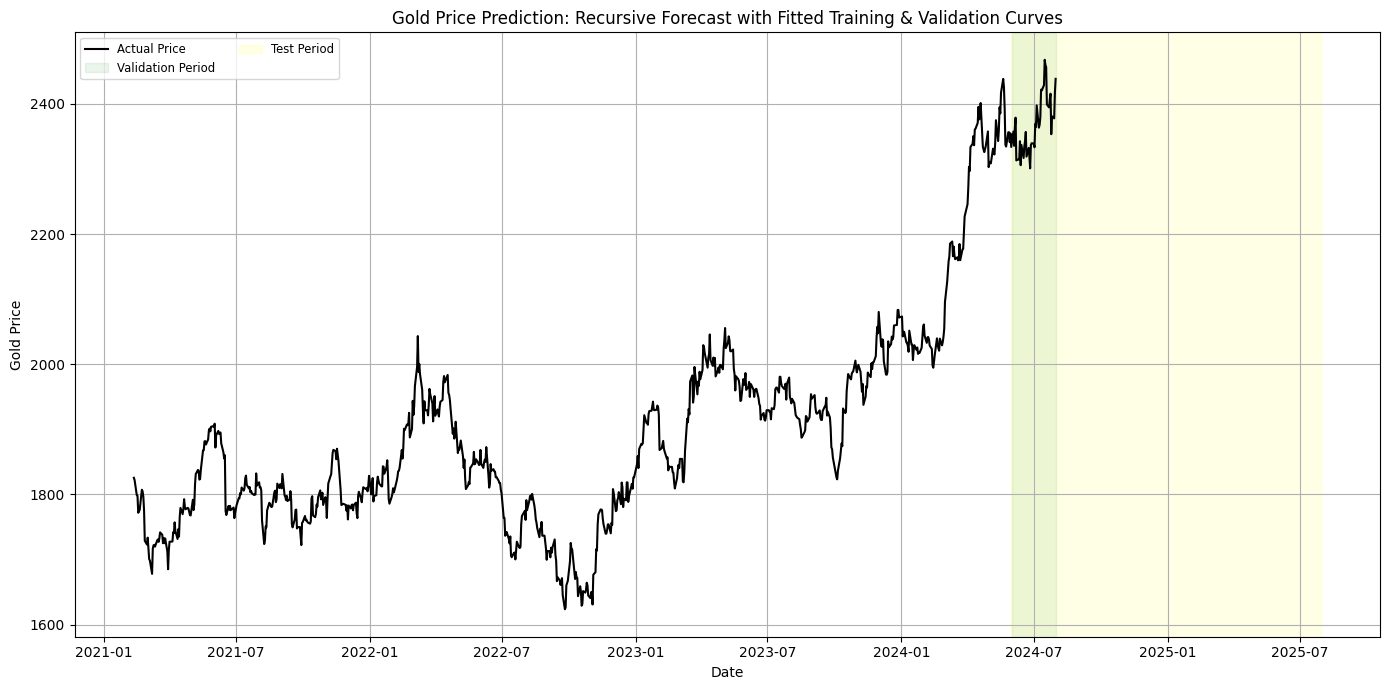

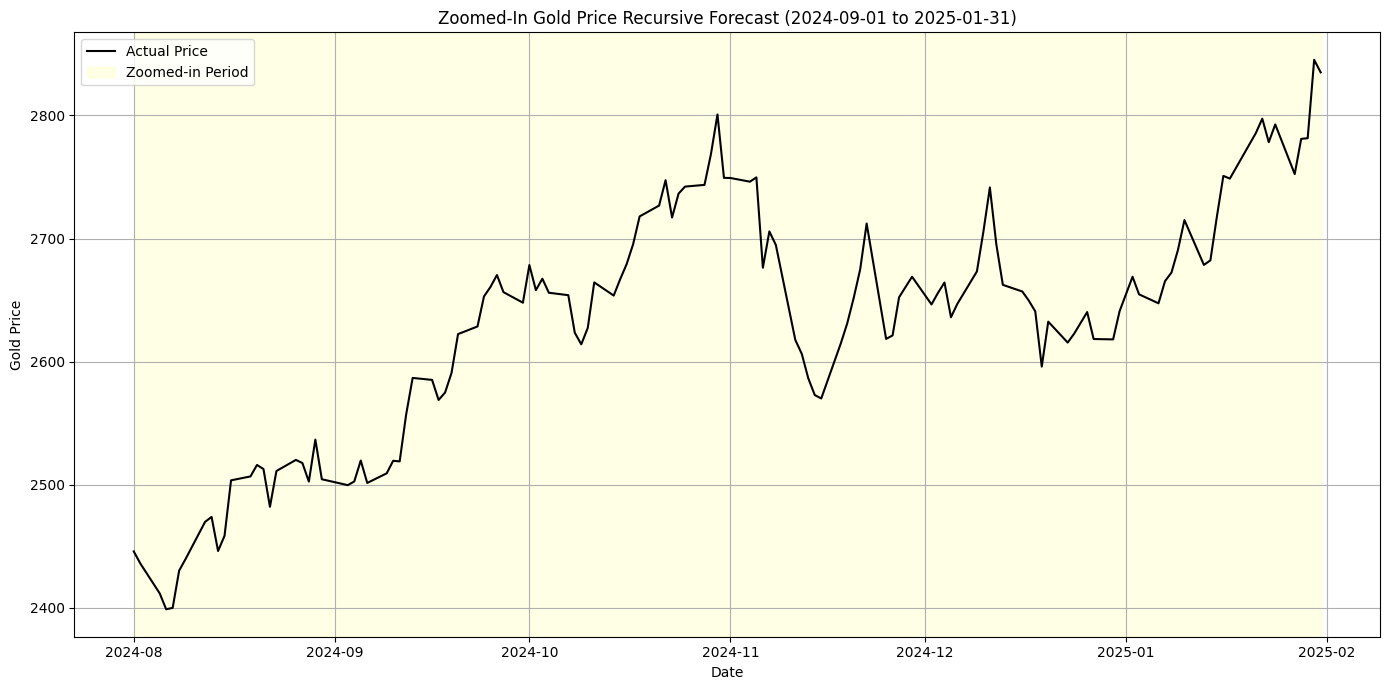

In [20]:
# --- Load the new CSV that contains the reference actual prices ---
df_new = pd.read_csv('Gold Futures Historical Data_3Yr.csv')
df_new.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new.sort_values(by='Date', ascending=True, inplace=True)
df_new.reset_index(drop=True, inplace=True)

# Transform columns to numeric values (same as before)
num_cols_new = df_new.columns.drop(['Date'])
df_new[num_cols_new] = df_new[num_cols_new].replace({',': ''}, regex=True)
df_new[num_cols_new] = df_new[num_cols_new].astype('float64')

# --- Extract the zoomed-in period actual prices ---
# Define the zoomed-in period (e.g., 2024-09-01 to 2025-01-31)
zoom_start = pd.to_datetime('2024-08-01')
zoom_end   = pd.to_datetime('2025-01-31')

# Filter the DataFrame to only include rows within the zoomed period.
mask_zoom = (df_new['Date'] >= zoom_start) & (df_new['Date'] <= zoom_end)
df_zoom   = df_new.loc[mask_zoom]

# Extract the dates and the reference prices from the new CSV.
test_reference_dates = df_zoom['Date'].values
test_reference_prices = df_zoom['Price'].values


# Prepare sequences and corresponding dates
X, y_full, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y_full.append(data_scaled[i, 0])  # Assuming 'Price' is the target
    dates.append(df['Date'].iloc[i])



X = np.array(X)
y_full = np.array(y_full)
full_dates = np.array(dates)
full_actual = inverse_transform(y_full)   # Save the actual price curve (e.g. shape (N_full,))


# Plot the entire dataset along with the recursive forecast from each model over the test window.
plt.figure(figsize=(14, 7))
# Plot actual prices (inverse transformed) for all dates.
#all_prices_inv = scaler.inverse_transform(data_scaled)[:, 0]
plt.plot(full_dates, full_actual, color='black', label='Actual Price')
plt.axvspan(pd.to_datetime('2024-06-01'), pd.to_datetime('2024-07-31'),color='green', alpha=0.08, label='Validation Period')
plt.axvspan(pd.to_datetime('2024-05-31'), df['Date'].iloc[-1], color='yellow', alpha=0.1, label='Test Period')

model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}


mask_test_zoom = (test_dates >= zoom_start) & (test_dates <= zoom_end)
zoom_test_dates = test_dates[mask_test_zoom]

for model_name, preds in predictions_all.items():
    # Here we assume preds['test'] is an array of predicted prices for test_dates.
    zoom_model_preds = preds['test'][mask_test_zoom]  # filter predictions for the zoomed period
    plt.plot(zoom_test_dates, zoom_model_preds, color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')
    plt.plot(val_dates, preds['val'], color=model_colors.get(model_name, 'grey'),
             linestyle='--', linewidth=2, label=f'{model_name} Val')


plt.title('Gold Price Prediction: Recursive Forecast with Fitted Training & Validation Curves')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Now, plot your predictions together with the zoomed-in actual prices ---
plt.figure(figsize=(14, 7))
# Plot the actual prices from the new CSV (black solid line)
plt.plot(test_reference_dates, test_reference_prices, color='black', label='Actual Price')

# (Optional) Highlight the zoomed region with a shallow color
plt.axvspan(zoom_start, zoom_end, color='yellow', alpha=0.1, label='Zoomed-in Period')

# Plot each model's test predictions (here, assumed to be stored in predictions_all)
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'SVM': 'purple',
    'BOOST': 'brown'
}

# IMPORTANT: Ensure that your model predictions (e.g. predictions_all[model_name]['test'])
# are defined on dates that fall within (or can be matched to) the zoomed period.
# For example, if test_dates already covers the zoomed period, you can further filter:
mask_test_zoom = (test_dates >= zoom_start) & (test_dates <= zoom_end)
zoom_test_dates = test_dates[mask_test_zoom]

for model_name, preds in predictions_all.items():
    # Here we assume preds['test'] is an array of predicted prices for test_dates.
    zoom_model_preds = preds['test'][mask_test_zoom]  # filter predictions for the zoomed period
    plt.plot(zoom_test_dates, zoom_model_preds, color=model_colors.get(model_name, 'grey'),
             linestyle=':', linewidth=2, label=f'{model_name} Test')

plt.title('Zoomed-In Gold Price Recursive Forecast (2024-09-01 to 2025-01-31)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
